In [1]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset
import numpy as np
from torch.utils.data import DataLoader
import torchvision.transforms as T
import torch

In [2]:
class TrainDataset(Dataset):
    def __init__(self, protein_id, pair_dir, matrix_dir, transform=None):
        self.protein_id = protein_id
        self.matrix_dir = matrix_dir
        self.transform = transform
        pair_path = pair_dir + protein_id + ".txt"
        self.id_label_list = self.get_id_label_list(pair_path)

    def __len__(self):
        return len(self.id_label_list)

    def __getitem__(self, idx):
        id = self.id_label_list[idx][0]
        label = self.id_label_list[idx][1]
        matrix_path = self.matrix_dir + id + ".npy"
        # matrix = np.expand_dims(np.load(matrix_path, allow_pickle=True), 0)
        matrix = torch.from_numpy(np.expand_dims(np.load(matrix_path, allow_pickle=True), 0))
        if self.transform:
            matrix = self.transform(matrix)
        return id, matrix, label
    
    def get_id_label_list(self, pair_path):
        id_label_list = []
        with open(pair_path, "r") as f_r:
            while True:
                lines = f_r.readline()
                if not lines:
                    break
                id= lines.split('\t')[0]
                label = lines.split('\t')[1].split("\n")[0]
                id_label_list.append((id, label))
        return id_label_list
        

In [3]:
protein_id = "d1a0aa_"
pair_dir = "/home/wngys/lab/DeepFold/pair/new_train_pair_bool_90/"
matrix_dir = "/home/wngys/lab/DeepFold/distance_matrix_r/distance_matrix_mine_r/"
# transform = None
transform = T.Compose([
    T.Resize((256, 256)),
    T.Normalize(mean=[0.0660], std=[0.0467])
])
train_dataset = TrainDataset(protein_id, pair_dir, matrix_dir, transform)

In [4]:
batch_size = 64

In [5]:
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=False, num_workers=2, pin_memory=True)

In [6]:
for ids, matrices, labels in train_dataloader:
    print(len(ids))
    print(ids)
    print(matrices.shape)
    print(matrices)
    print(len(labels))
    print(labels)
    break

64
['d1a0aa_', 'd1nlwa_', 'd1nkpe_', 'd1am9a_', 'd1nkpe_', 'd1am9a_', 'd1nlwa_', 'd1h3oa_', 'd2dbna_', 'd2wcja_', 'd2py5a2', 'd1d9ca_', 'd4i43b3', 'd1i6la_', 'd1m5ya1', 'd4wbta1', 'd3pdia_', 'd2hs5a2', 'd2ayua1', 'd1v64a1', 'd1o6da1', 'd1gkma_', 'd1j0ta_', 'd1v33a_', 'd1w23a_', 'd1pj5a2', 'd4a5xa_', 'd1sdia1', 'd1to3a1', 'd1bkra_', 'd4ggfc_', 'd4my5a_', 'd1ta8a_', 'd3hdga1', 'd1on3a1', 'd1ewka_', 'd4dv8a1', 'd2irpa_', 'd1j5rb1', 'd3eevc_', 'd2aexa_', 'd1xdia1', 'd3nfta_', 'd2azea1', 'd1y9za_', 'd1ybta_', 'd3g5ka1', 'd1huxa_', 'd5ggya1', 'd1u5tb1', 'd4f2na1', 'd1ia9a_', 'd2zy9a3', 'd1i1rb_', 'd1mtyb_', 'd2pf1a2', 'd3r5ga_', 'd2gr7a1', 'd1y02a1', 'd2q0zx1', 'd2ar5a1', 'd3vaya_', 'd1ks8a1', 'd4hc6a_']
torch.Size([64, 1, 256, 256])
tensor([[[[ 5.4559,  5.4559,  5.3103,  ..., -1.0572, -1.0595, -1.0595],
          [ 5.4559,  5.4559,  5.3103,  ..., -1.0572, -1.0595, -1.0595],
          [ 5.3103,  5.3103,  5.1982,  ..., -1.0555, -1.0578, -1.0578],
          ...,
          [-1.0572, -1.0572, -1

d1a0aa_


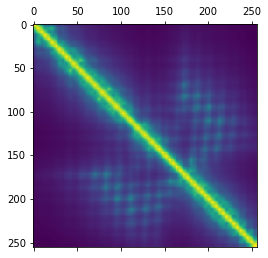

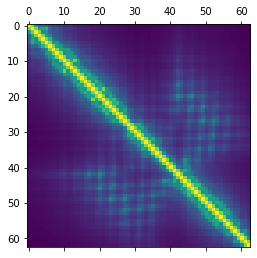

d1nlwa_


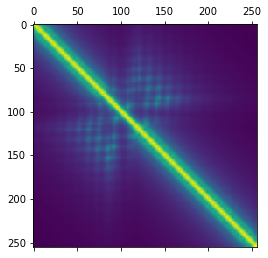

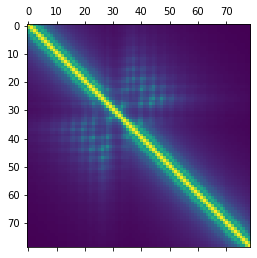

d1nkpe_


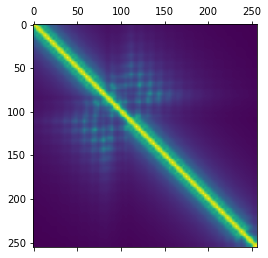

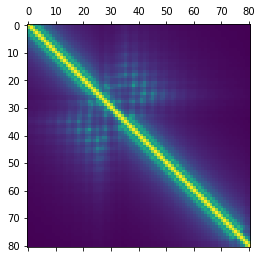

d1am9a_


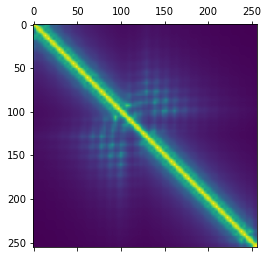

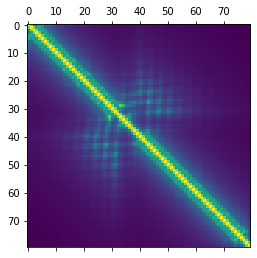

d1nkpe_


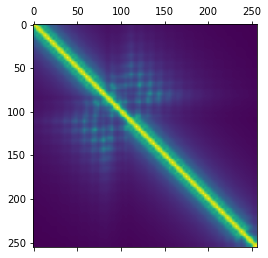

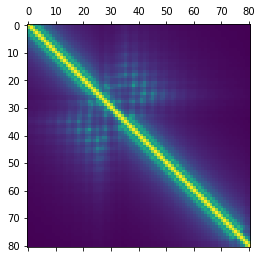

d1am9a_


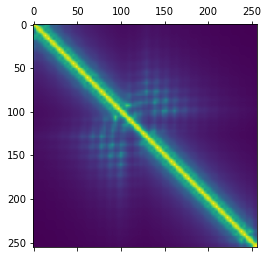

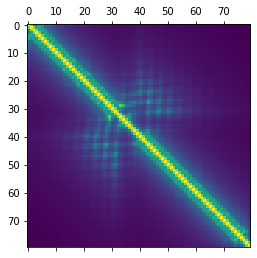

d1nlwa_


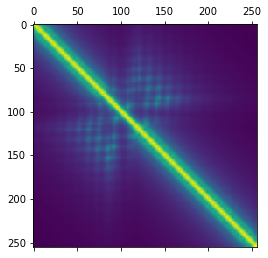

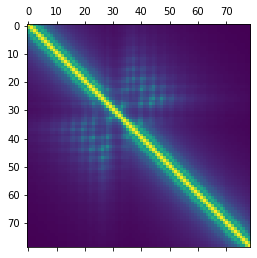

d1h3oa_


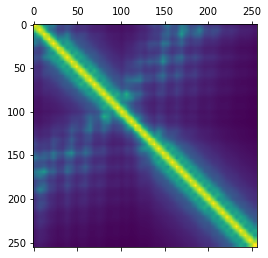

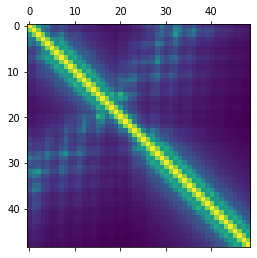

d2dbna_


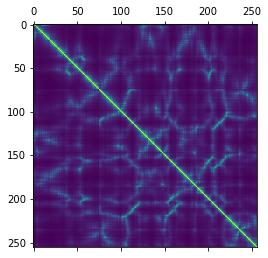

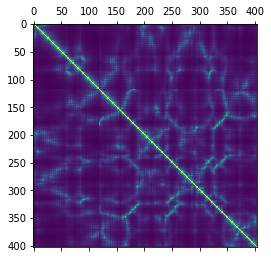

d2wcja_


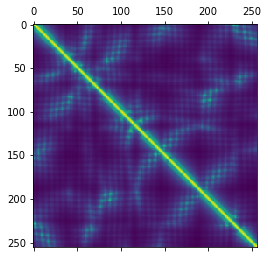

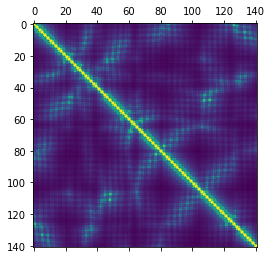

d2py5a2


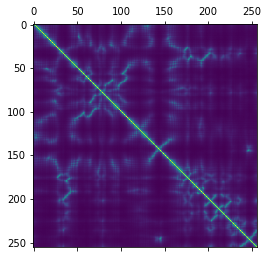

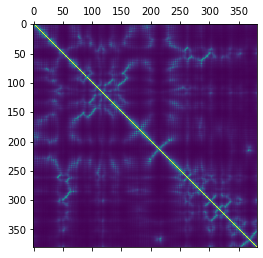

d1d9ca_


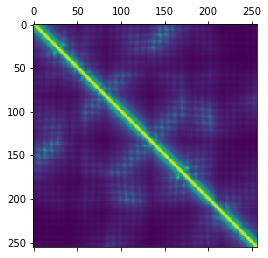

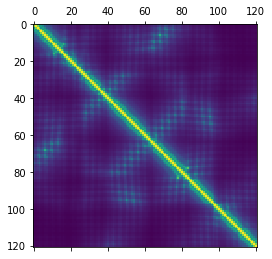

d4i43b3


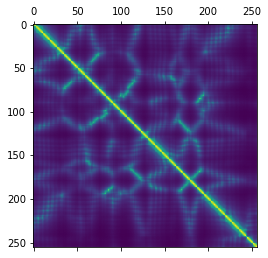

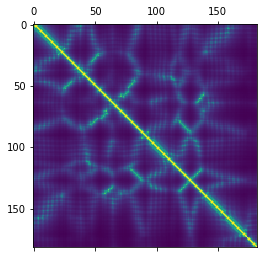

d1i6la_


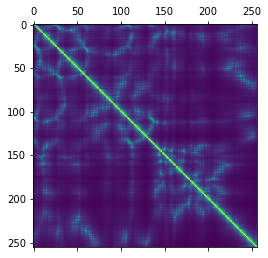

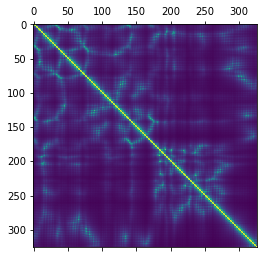

d1m5ya1


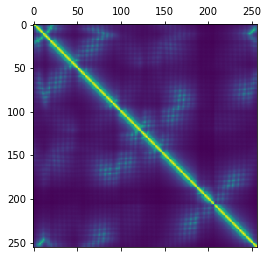

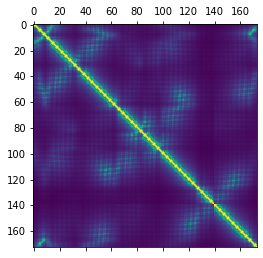

d4wbta1


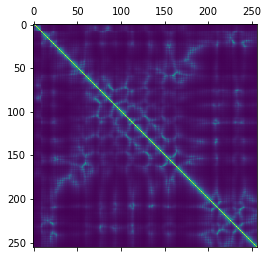

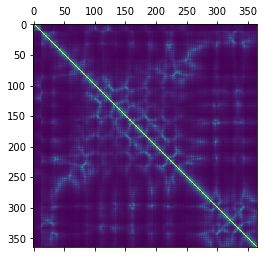

d3pdia_


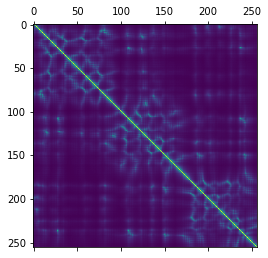

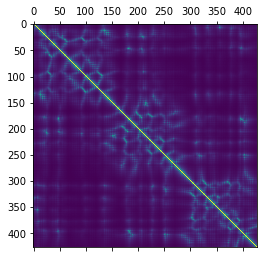

d2hs5a2


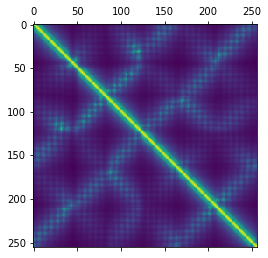

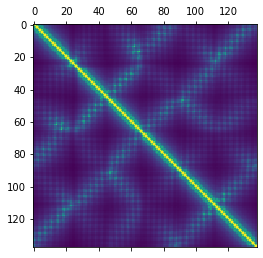

d2ayua1


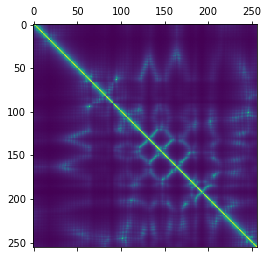

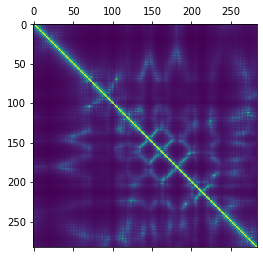

d1v64a1


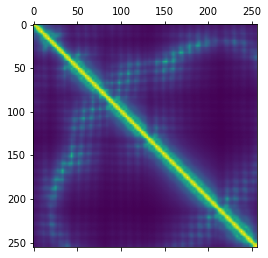

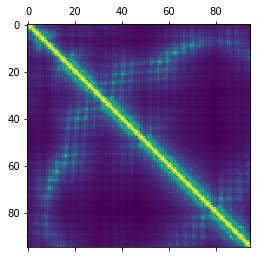

d1o6da1


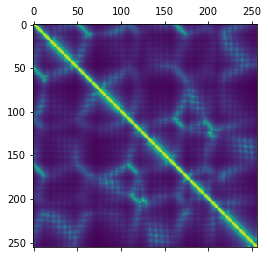

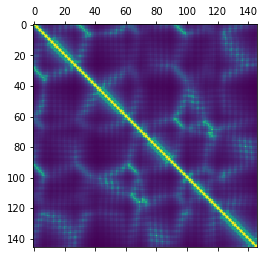

d1gkma_


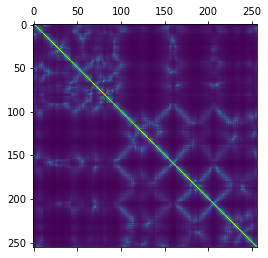

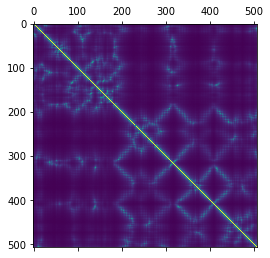

d1j0ta_


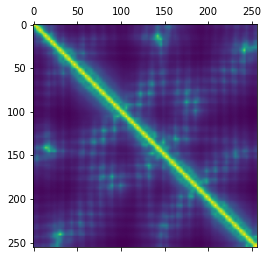

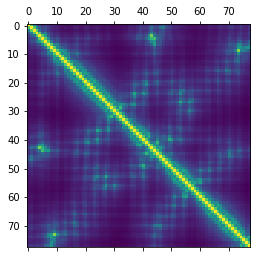

d1v33a_


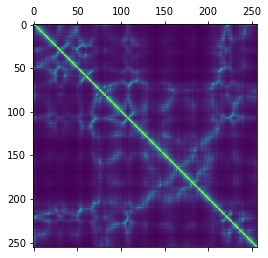

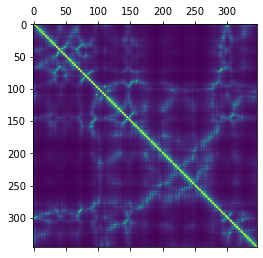

d1w23a_


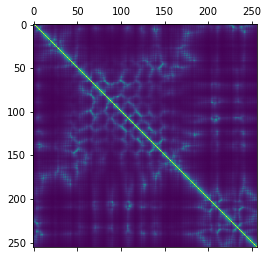

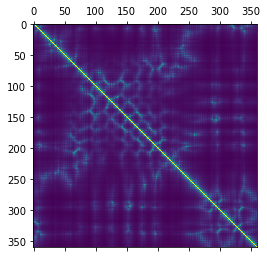

d1pj5a2


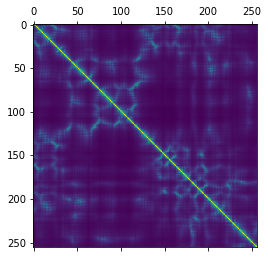

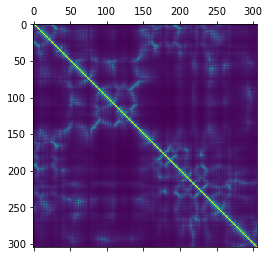

d4a5xa_


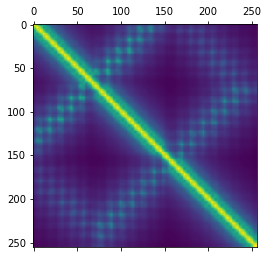

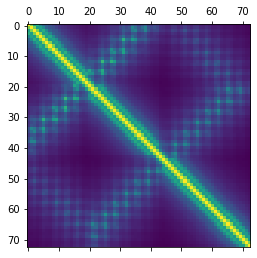

d1sdia1


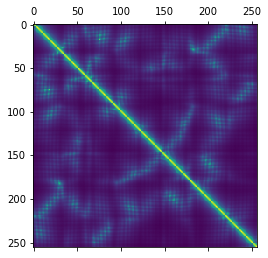

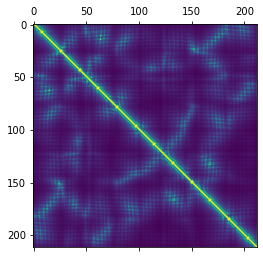

d1to3a1


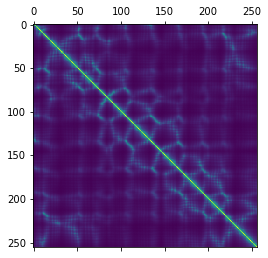

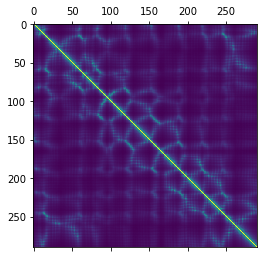

d1bkra_


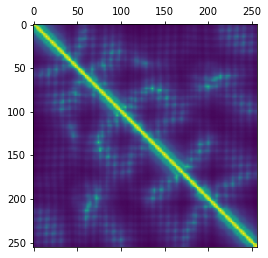

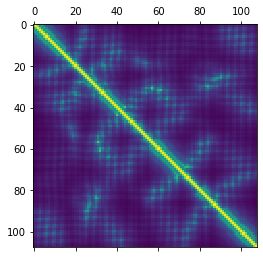

d4ggfc_


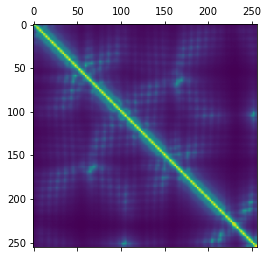

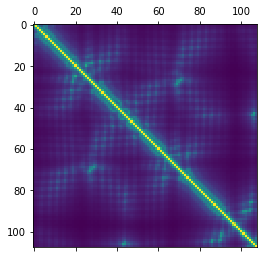

d4my5a_


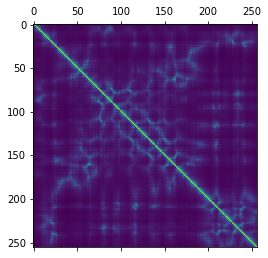

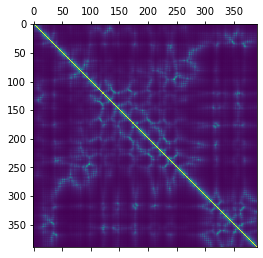

d1ta8a_


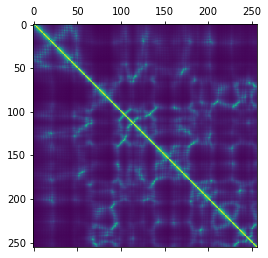

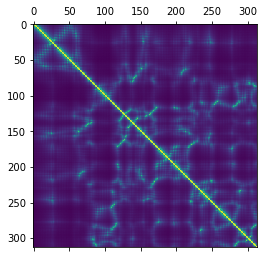

d3hdga1


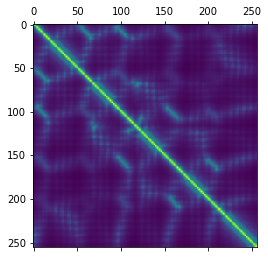

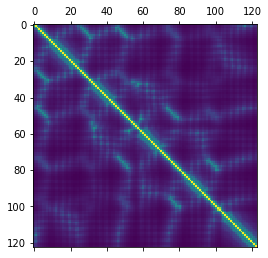

d1on3a1


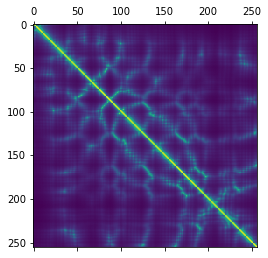

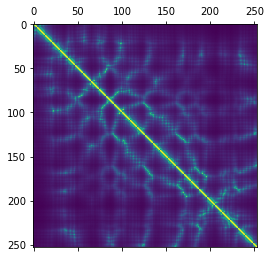

d1ewka_


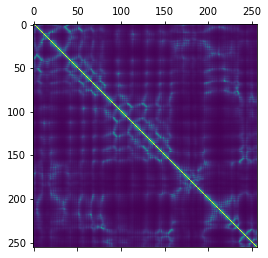

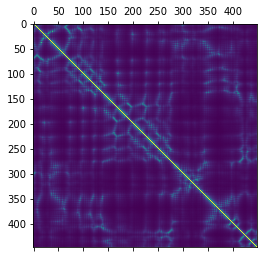

d4dv8a1


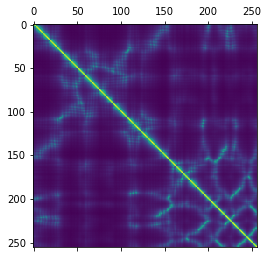

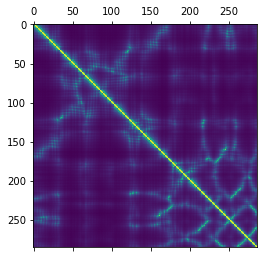

d2irpa_


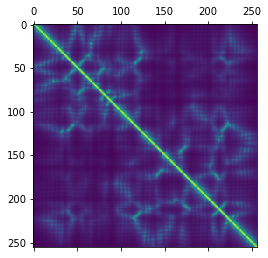

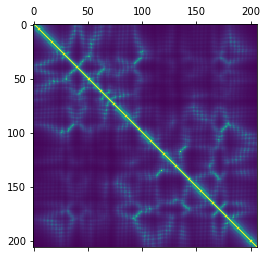

d1j5rb1


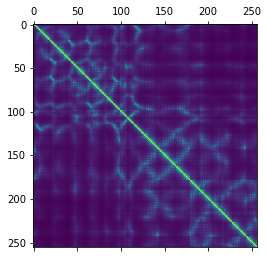

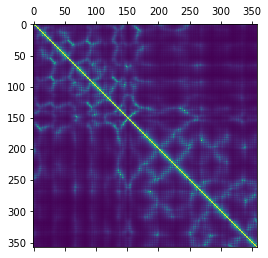

d3eevc_


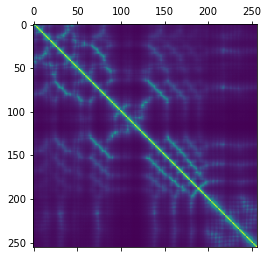

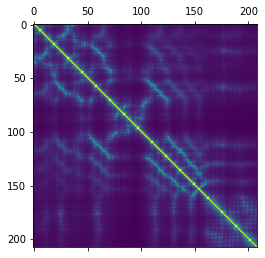

d2aexa_


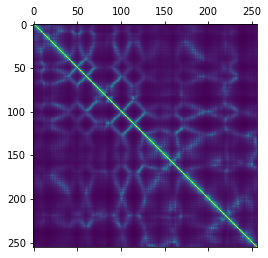

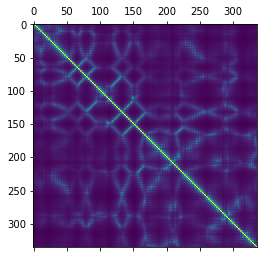

d1xdia1


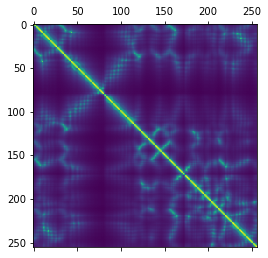

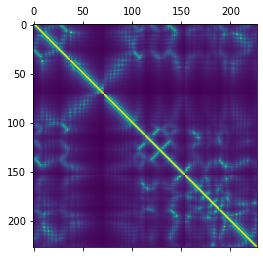

d3nfta_


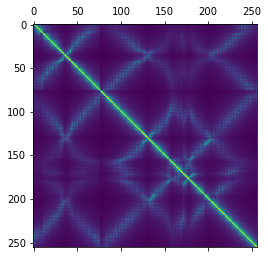

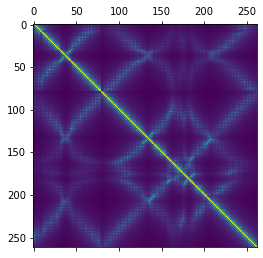

d2azea1


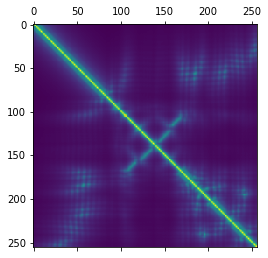

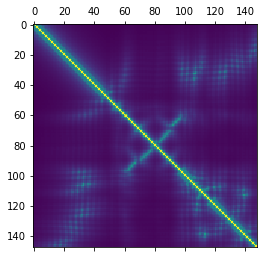

d1y9za_


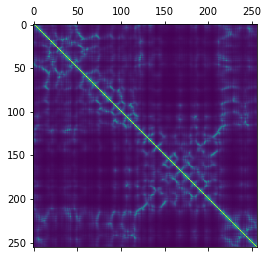

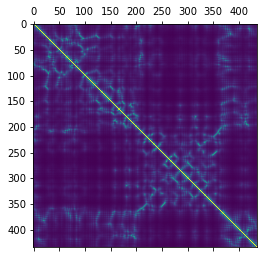

d1ybta_


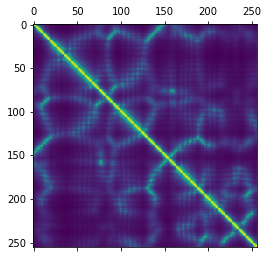

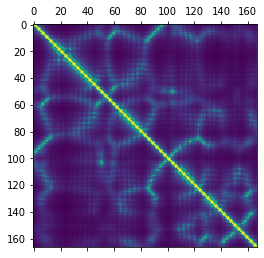

d3g5ka1


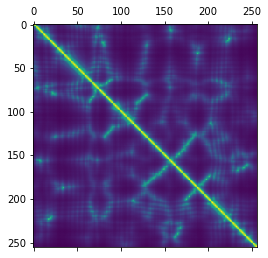

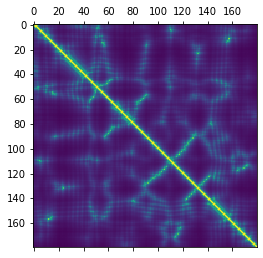

d1huxa_


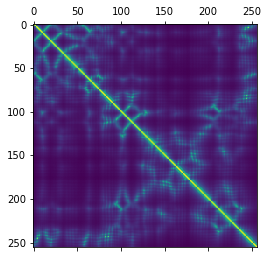

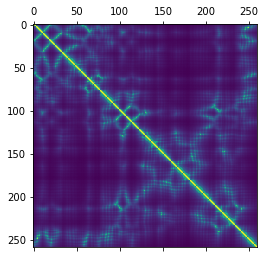

d5ggya1


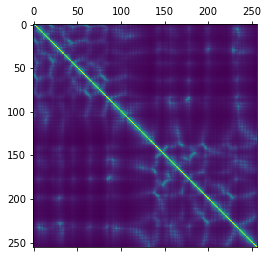

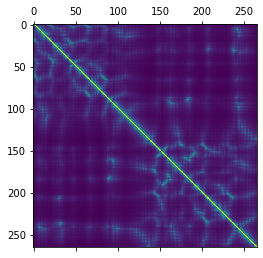

d1u5tb1


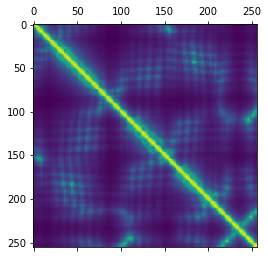

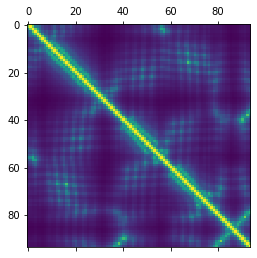

d4f2na1


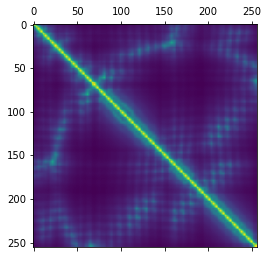

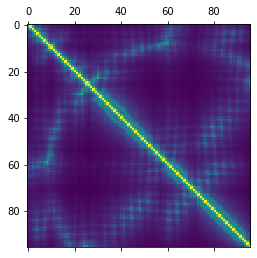

In [8]:
import matplotlib.pyplot as plt

for ids, matrices, labels in train_dataloader:
    idx = 0
    while True:
        id = ids[idx]

        matrix = matrices[idx][0].numpy()
        print(id)
        # print(matrix.shape)
        plt.matshow(matrix)
        plt.show()

        path = "/home/wngys/lab/DeepFold/distance_matrix_r/distance_matrix_mine_r/" + id + ".npy"
        matrix = np.load(path, allow_pickle=True)
        plt.matshow(matrix)
        plt.show()

        idx += 1
        if idx > 50:
            break
    break